#**Linear Regression(SGD)**



---
Importing the required packages


---



In [0]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [0]:
# Importing some packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.datasets import california_housing
from scipy import stats
import seaborn as sns
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
from sklearn import svm
from random import randint


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.california_housing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm




---
Using the same dataset **california_housing** try to find the best fit of the dataset by implementing stocastic gradient descent from scratch. 


---



In [0]:
housing_data = california_housing.fetch_california_housing()
housing_data

In [0]:
Features = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
Target = pd.DataFrame(housing_data.target, columns=['Target'])
df = Features.join(Target)

In [0]:
# to check for null values
df['MedInc'].isnull().values.any()

False

In [0]:
df.describe()

In [0]:
df.corr()

In [0]:
df[['MedInc','Target']].describe()

In [0]:
df = df[df.Target < 5]
df.shape

(19648, 9)

In [0]:
# Normalization of MedInc and Target
def Norm(x):
  minx=x.min()
  maxx=x.max()
  return pd.Series([(i-minx)/(maxx-minx) for i in x])

x= Norm(df.MedInc)
y= Norm(df.Target)

print('Maximum value of MedInc={}'.format(x.max()))
print('Maximum value of Target={}'.format(y.max()))

Maximum value of MedInc=1.0
Maximum value of Target=1.0


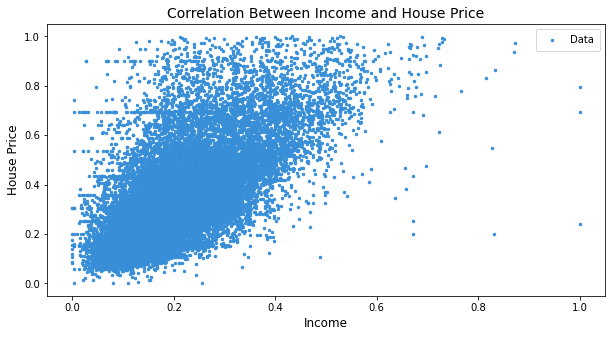

In [0]:
plt.figure(figsize=(10,5))
plt.scatter(x, y, label='Data', c='#388fd8', s=6)
plt.title('Correlation Between Income and House Price', fontSize=14)
plt.xlabel('Income', fontSize=12)
plt.ylabel('House Price', fontSize=12)
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=0.6)
plt.show()

In [0]:
x= np.array(x).reshape((-1, 1))
y= np.array(y)

print(x.ndim)
print(x.shape)

2
(19648, 1)


In [0]:
model= LinearRegression(normalize=False)
model.fit(x,y)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 0.10336187126396168
slope: [1.19772056]


In [0]:
y_pred=model.predict(x)
print(y_pred)
print(y_pred.ndim)

[0.74973383 0.74776795 0.66153326 ... 0.20249047 0.21630123 0.25936902]
1


In [0]:
y_pred = model.intercept_ + model.coef_ * x
print('predicted resposne:', y_pred, sep='\n')
print(type(y_pred))
print(y_pred.ndim)

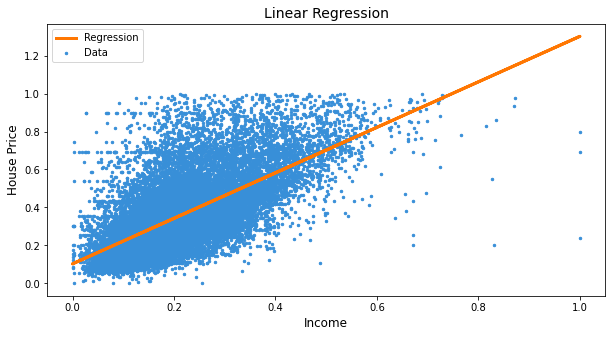

In [0]:
plt.figure(figsize=(10,5))
plt.scatter(x, y, label='Data', c='#388fd8', s=6)
plt.plot(x, y_pred, c= '#ff7702', lw=3, label='Regression')
plt.title('Linear Regression', fontSize=14)
plt.xlabel('Income', fontSize=12)
plt.ylabel('House Price', fontSize=12)
plt.legend(frameon=True, loc=0, fontsize=10)
plt.show()

In [0]:
class LinearRegression:

    def fit(self, X, y):
      self.X= X
      self.y= y
      self.m= ((np.mean(X)* np.mean(y) - np.mean(X*y)) / ((np.mean(X)**2) - np.mean(X**2)))
      self.b= np.mean(y) - self.m * np.mean(X)

    def coeffs(self):
      return self.m, self.b

    def predict(self):
      self.y_pred= self.m*self.X + self.b
      return self.y_pred

In [0]:
## Normalization of MedInc and Target

def Norm(x):
  minx=x.min()
  maxx=x.max()
  return pd.Series([(i-minx)/(maxx-minx) for i in x])

x= Norm(df.MedInc)
y= Norm(df.Target)

print('Maximum value of MedInc={}'.format(x.max()))
print('Maximum value of Target={}'.format(y.max()))

Maximum value of MedInc=1.0
Maximum value of Target=1.0


In [0]:
lr = LinearRegression()
lr.fit(x,y)
y_pred = lr.predict()
m,b = lr.coeffs()
print('MSE:{}'.format(mean_squared_error(y, y_pred)))
print('Slope:{}'.format(m))
print('Intercept:{}'.format(b))

MSE:0.023408891983089833
Slope:1.1977205624290637
Intercept:0.10336187126397767


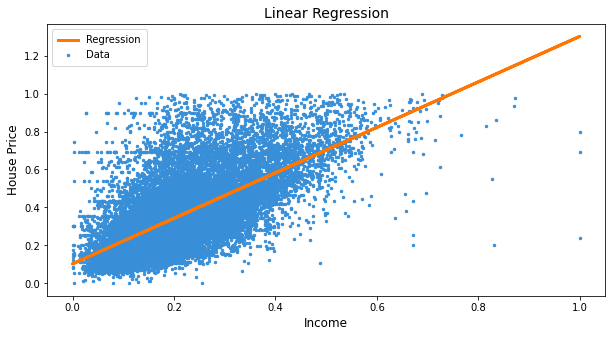

In [0]:
plt.figure(figsize=(10,5))
plt.scatter(x, y, label='Data', c='#388fd8', s=6)
plt.plot(x, y_pred, c= '#ff7702', lw=3, label='Regression')
plt.title('Linear Regression', fontSize=14)
plt.xlabel('Income', fontSize=12)
plt.ylabel('House Price', fontSize=12)
plt.legend(frameon=True, loc=0, fontsize=10, borderpad= 0.6)
plt.show()

**Gradient** **Descent**

In [0]:
def gradient_descent(X,y,lr ,epoch, batch_size=1):
     m,b = 0.1,0.1 # parameters
     mse= []
     N = len(X) # No. of Observations


     for _ in range(epoch):
       
       f = y - (m*X + b)
       
       # updating m and b
       m -= lr * (-2 * X.dot(f).sum() / N)
       b -= lr * (-2 * f.sum() / N)
       mse.append(mean_squared_error(y, (m*X + b)))
      
     return m, b, mse

In [0]:
## m, b,  mse = SGD(X, y, lr=0.01, epochs=100, batch_size=2)

X= df.MedInc
y= df.Target

m, b,  mse = gradient_descent(X, y, lr=0.01, epoch=100, batch_size=2)

y_pred = m*X + b

print('MSE:', mean_squared_error(y, y_pred))

MSE: 0.5546937005203618


Plot the SGD curve(MSE against the epochs), and the line which represents the best fit of the given dataset.

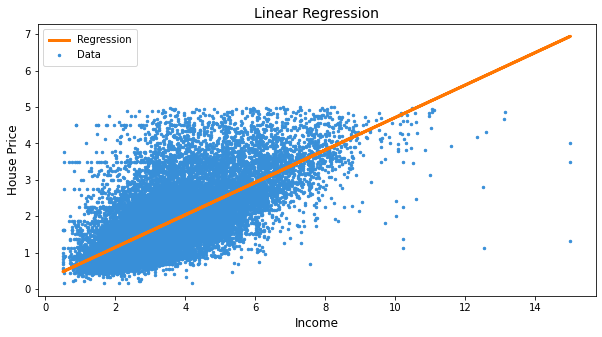

In [0]:
plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.plot(X, y_pred, c= '#ff7702', lw=3, label='Regression')
plt.title('Linear Regression', fontSize=14)
plt.xlabel('Income', fontSize=12)
plt.ylabel('House Price', fontSize=12)
plt.legend(frameon=True, loc=0, fontsize=10, borderpad= 0.6)
plt.show()

No handles with labels found to put in legend.


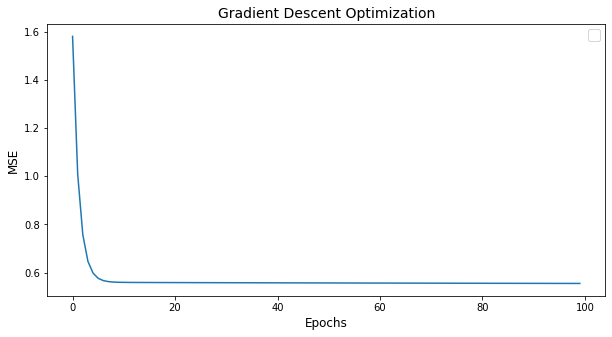

In [0]:
plt.figure(figsize=(10,5))
plt.plot(range(len(mse)), mse)
plt.title('Gradient Descent Optimization', fontSize=14)
plt.xlabel('Epochs', fontSize=12)
plt.ylabel('MSE', fontSize=12)
plt.legend(frameon=True, loc=0, fontsize=10, borderpad= 0.6)
plt.show()

#**SVM**



---


**Generating Random linearly separable data**


---



In [0]:
data = [[np.random.rand(), np.random.rand()] for i in range(10)]
for i, point in enumerate(data):
  x, y = point
  if 0.5*x - y + 0.25 > 0:
    data[i].append(-1)
  else:
    data[i].append(1)



---


**Visualizing the above data**


---



0.6885597485437829

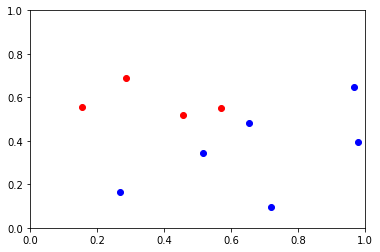

In [0]:
for x, y, l in data:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  plt.scatter(x, y, c=clr)
  plt.xlim(0,1)
  plt.ylim(0,1)
y



---


**Run SVM Classifier**


---



In [0]:
data = np.asarray(data)
x = data[:,:2]
y = data[:,2]
from sklearn import svm
from sklearn.linear_model import SGDClassifier

clf = svm.SVC(kernel='linear', C=1000)
#clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(x, y)
x

array([[0.97931954, 0.39407095],
       [0.71889069, 0.09790702],
       [0.26877702, 0.16332974],
       [0.15513944, 0.55409503],
       [0.65400175, 0.48333719],
       [0.96671929, 0.64730997],
       [0.45616563, 0.51816049],
       [0.5713885 , 0.55128186],
       [0.51706178, 0.3457638 ],
       [0.28742562, 0.68855975]])



---


**Train a SVM classifier using gradient descent and return a Weight Matrix which is a numpy array of length (N + 1) where N is dimension of training samples. You can refer to Fig. 1 in [this](https://www.cs.huji.ac.il/~shais/papers/ShalevSiSrCo10.pdf) paper for implementation. You can add arguments to svm_function according to your implementation.**


---



In [0]:
# !pip install pegasus


In [0]:
import math
def svm_function(x, y, weights=None, iterations=2000, lam=1):
    if type(weights) == type(None): weights = np.zeros(x[0].shape)
    num_S = len(y)
    for i in range(iterations):
        it = randint(0, num_S-1)
        step = 1/(lam*(i+1))
        decision = y[it] * weights @ x[it].T
        if decision < 1:
            #weights = min(1, (1/math.sqrt(lam))/(np.linalg.norm(weights)))*weights
            weights = (1 - step*lam) * weights + step*y[it]*x[it]
        else:
            weights = (1 - step*lam) * weights
            #weights = min(1, (1/math.sqrt(lam))/(np.linalg.norm(weights)))*weights
    return weights

In [0]:
WW=svm_function(x, y, weights=None, iterations=2000, lam=1)
WW

array([-0.26230341,  0.02136731])

# **Visualize the classifier**


---

Write a code to draw a lines corrosponding to 'w' vector you got as output from svm_function and for a line from which actual data was generated (0.5*x - y + 0.25). 

---



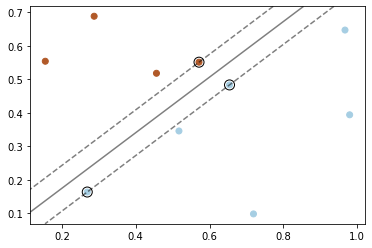

In [0]:
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Paired)
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 10)
yy = np.linspace(ylim[0], ylim[1], 10)

YY, XX = np.meshgrid(yy, xx)

xy = np.vstack([XX.ravel(), YY.ravel()]).T

#decision_function(self, X) evaluates the decision function for the samples in X.
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

# y1= WW[0]*x + 0.25
# y2= WW[1]*x + 0.25
# plt.plot(x, y1, c= '#ff7702', lw=3, label='Regression')
# plt.plot(x, y2, c= 'green', lw=3, label='Regression')
plt.show()

In [0]:
# the support vectors are:
clf.support_vectors_

array([[0.26877702, 0.16332974],
       [0.65400175, 0.48333719],
       [0.5713885 , 0.55128186]])